<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

# <center><b>Model Evaluation Techniques Assignment (Solution)<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **Evaluating** a machine learning model is as **important** as **building** it.

- We are creating models to perform on **new, previously unseen data**.

- Hence, a **thorough** and **versatile evaluation** is required to create a **robust** model.

- When it comes to **classification models**, evaluation process gets somewhat tricky.

- The various evaluation metrics that will be used are:

  - **Accuracy:** It is a metric that calculates the number of correct predictions divided by the total number of predictions.

  - **Precision:** It measures how good our model is when the prediction is positive.

  - **Recall:** It measures how good our model is at correctly predicting positive classes.

  - **F1-Score:** It is the weighted average of precision and recall.

  - **ROC Curve:** It summarizes the performance of the model at different threshold values.

  - **Precision Recall Curve:** It shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision.




---
<a name = Section2></a>
# **2. Problem Statement**
---

- A condition in which the tissues in the **kidney** become **inflamed** and have problems filtering waste from the blood.

- Nephritis may be caused by **infection**, **inflammatory** conditions, certain **genetic conditions**, and other diseases or conditions.

- XYB Diagnostics are **renowned** for their **expertise** in diagnosing nephritis.

<center><img src="https://us.123rf.com/450wm/alkov/alkov1808/alkov180800012/112010269-illustration-of-the-accute-pyelonephritis-with-the-pus-inside-the-kidney-and-severe-inflammation-nor.jpg?ver=6" width=30%></center>

- They want to go a step ahead and **automate** the process of **detecting nephritis** depending on various criteria.

- For this automation, they have hired a data scientist. Let's say it is you.

- You are provided with a **historical data of patients** who were suffered from nephritis and some patients who showed similar symptoms to nephritis.

- Your task is to **create a model** based on this data so that it can be used in real time to **determine** if a patient is **suffering from nephritis**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
# !pip install -q datascience                                         # Package that is required by pandas profiling
# !pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# !pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
# !pip install -q --upgrade pandas-profiling
# !pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data into train and test datasets
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Model
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of a classifier
from sklearn.metrics import precision_score                         # To calculate the precision of a classifier
from sklearn.metrics import recall_score                            # To calculate the recall of a classifier
from sklearn.metrics import f1_score                                # To calculate the f1-score of a classifier
from sklearn.metrics import precision_recall_curve                  # To plot the precision-recall curve of a classifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

d:\MY-DSMLAI\ML\Model Evaluation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The data was created by a **medical expert** as a data set to **help build a system** which will perform the presumptive **diagnosis of nephritis**.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 120 | 8 | 4 KB|

</br>

| Id | Features | Description |
| :-- | :-- | :-- |
| 01 | **temperature** | Temperature of patient |
| 02 | **nausea** | Occurrence of nausea |
| 03 | **lumbar_pain** | Muscle strain is often the cause of back pain from heavy lifting or vigorous exercise |
| 04 | **urine_pushing** | Urine pushing (continuous need for urination) |
| 05 | **micturition_pain** | Pain while urinating |
| 06 | **burning** | Burning of urethra, itch, swelling of urethra outlet |
| 07 | **inflamation** | Inflammation of urinary bladder |
| 08 | **nephritis** | Nephritis of renal pelvis origin |

In [2]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/diagnosis.csv', delimiter='\t')
print('Data Shape:', data.shape)
data.head()

Data Shape: (120, 8)


,temperature,nausea,lumbar_pain,urine_pushing,micturition_pain,burning,inflammation,nephritis
0,35.50,no,yes,no,no,no,no,no
1,35.90,no,no,yes,yes,yes,yes,no
2,35.90,no,yes,no,no,no,no,no
3,36.00,no,no,yes,yes,yes,yes,no
4,36.00,no,yes,no,no,no,no,no


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [3]:
data.describe()

,temperature
count,120.00
mean,38.72
std,1.82
min,35.50
25%,37.10
50%,37.95
75%,40.60
max,41.50


**Observations:**

- Body temperature ranges from **35.50°C** upto **41.50°C** averaging around **38.72°C**.

- **Majority** patients have temperatures below **40°C**.

- The average **normal body temperature** is generally accepted as **37°C**.

- A temperature over **38°C** most often means you have a **fever** caused by an **infection** or **illness**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       120 non-null    float64
 1   nausea            120 non-null    object 
 2   lumbar_pain       120 non-null    object 
 3   urine_pushing     120 non-null    object 
 4   micturition_pain  120 non-null    object 
 5   burning           120 non-null    object 
 6   inflammation      120 non-null    object 
 7   nephritis         120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


**Observations:**

- There are **120 rows** with **8 features**.

- There are **7 object** datatype features and **one** **float64** datatype which is temperature.

- We have to convert some of the features into **appropriate** data types.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [5]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 63.19it/s]

Accomplished!


**Observations:**

- Dataset has **19 (15.8%) duplicate rows**.

- There is a slight class **imbalance** present (**50 True:70 False**) but it can be ignored.

- There are no missing values present.

- **nephritis** is **correlated** to **temperature**, **lumbar_pain** and **nausea**.



**Performing Operations**


---
**<h4>Question 1:** Create a function that performs the following cleaning operations on the dataset:</h4>

---

- Removes the whitespaces from column names.

- Removes the duplicate rows from the dataset.

- Maps 1 for 'yes' and 0 for 'no' for all categorical variables.

<details>

**<summary>Hint:</summary>**

- You can use `.str.replace(' ', '')` to remove whitespaces from the column names.

- You can use `.drop_duplicates` method to remove the duplicates.

- You can use `.map` method for the required changes.

</details>

In [6]:
def clean_data(data=None):
  # Removing white spaces from feature names
  data.columns = data.columns.str.replace(' ', '')

  # Dropping all the duplicate rows
  data.drop_duplicates(inplace=True)

  # Mapping 1 for 'yes' and 0 for 'no' for all categorical features
  for col in data.drop('temperature', axis=1).columns:
    data[col] = data[col].map(lambda x: 1 if (x=='yes') else 0)

In [7]:
clean_data(data=data)
data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pain,burning,inflammation,nephritis
0,35.50,0,1,0,0,0,0,0
1,35.90,0,0,1,1,1,1,0
2,35.90,0,1,0,0,0,0,0
3,36.00,0,0,1,1,1,1,0
4,36.00,0,1,0,0,0,0,0


<a name = Section52></a>
### **5.2 Post Profiling Report**

- Since we only mapped some of the features and removed duplicate rows from the dataset, we won't apply profiling to the dataset again.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question 2:** Create a function that checks patients experienced burning sensation and were diagnosed with nephritis.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inch figure

- You can use `sns.counplot` method on burning feature and keep nephritis as hue.

- Add cosmetics like grid and title

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [10]:
def burning(data=None):

  # Create a 15x7 inch figure
  fig = plt.figure(figsize=(15, 7))

  # Create a countplot for burning and keep nephritis as hue
  sns.countplot(data=data, y='burning', hue='nephritis')

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(ylabel='Burning', fontsize=14)
  plt.xlabel(xlabel='Count', fontsize=14)
  plt.title(label='Burning in relation to nephritis', fontsize=16)
  plt.grid(visible=True)

  # Display the plot
  plt.show()

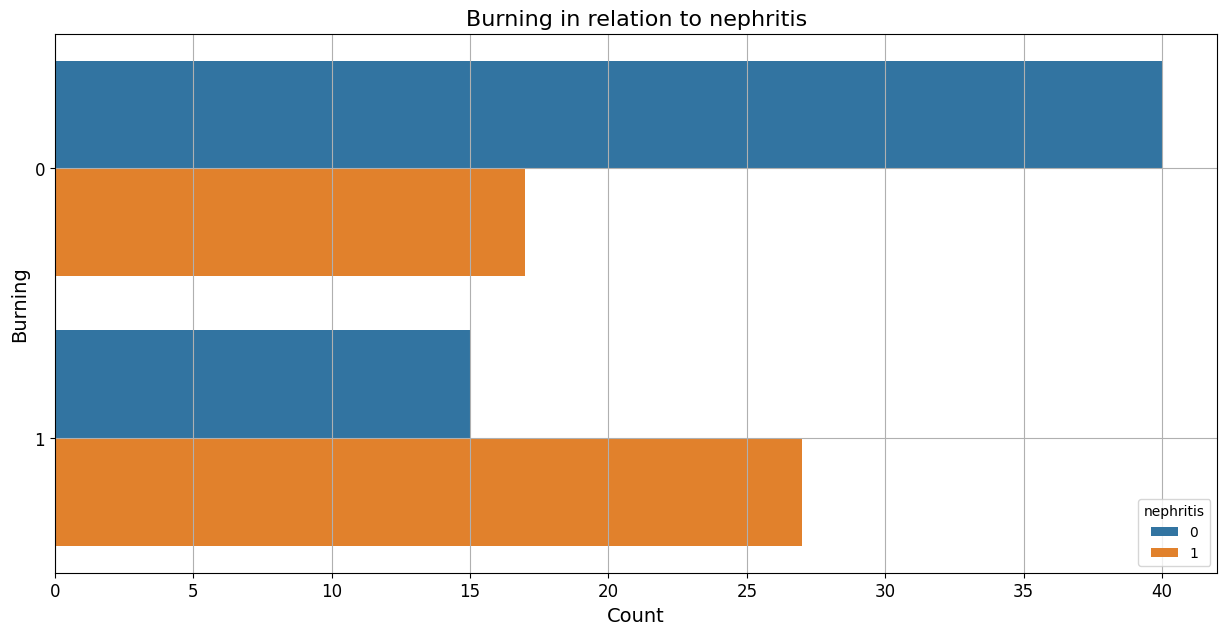

In [13]:
%matplotlib inline
burning(data=data)

**Observations:**

- Patients who **had burning** sensation had a higher chance of **suffering** from **nephritis**.

- Meanwhile, **majority** patients **did not** have a **burning** sensation and a large **proportion** of those **weren't diagnosed** with nephritis.


---
**<h4>Question 3:** Create a function that checks relation between nausea and body temperature.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inch figure

- You can use `sns.histplot` method on temperature feature keeping nausea as hue.

- Add cosmetics like grid and title

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [15]:
def nausea_n_temp(data=None):

  # Create a 15x7 inch figure
  fig = plt.figure(figsize=(15, 7))

  # Create a histplot for temperature and keep nausea as hue
  sns.histplot(data=data, x='temperature', hue='nausea')

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel(xlabel='Temperature', fontsize=14)
  plt.ylabel(ylabel='Count', fontsize=14)
  plt.title(label='Temperature in relation to nausea', fontsize=16)
  plt.grid(visible=True)

  # Display the plot
  plt.show()

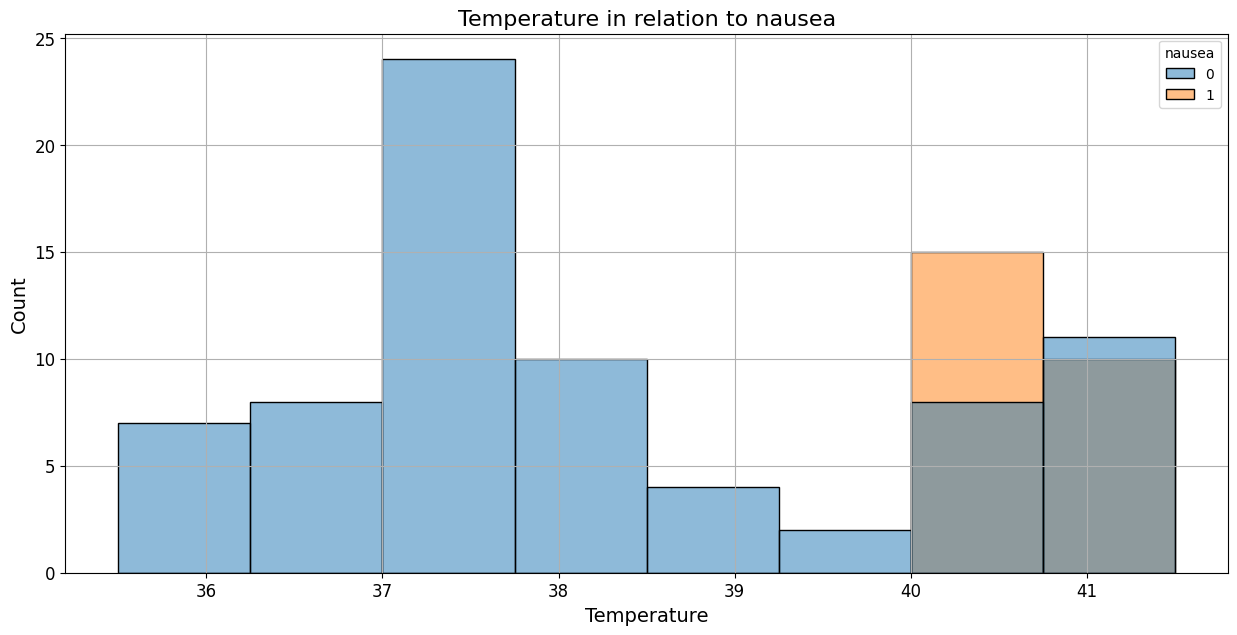

In [16]:
nausea_n_temp(data=data)

**Observations:**

- We can observe that patients whose temperautre go **above 40°C** suffer from **nausea**.


---
**<h4>Question 4:** Create a function that checks relation between nephritis and body temperature.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inch figure

- You can use `sns.kdeplot` method on temperature feature keeping nephritis as hue.

- Add cosmetics like grid and title

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [19]:
def niphritis_n_temp(data=None):

  # Create a 15x7 inch figure
  fig = plt.figure(figsize=(15, 7))

  # Create a kdeplot for temperature and keep nephritis as hue
  sns.kdeplot(data=data, x='temperature', hue='nephritis')

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel(xlabel='Temperature', fontsize=14)
  plt.ylabel(ylabel='Count', fontsize=14)
  plt.title(label='Temperature in relation to nephritis', fontsize=16)
  plt.grid(visible=True)

  # Display the plot
  plt.show()

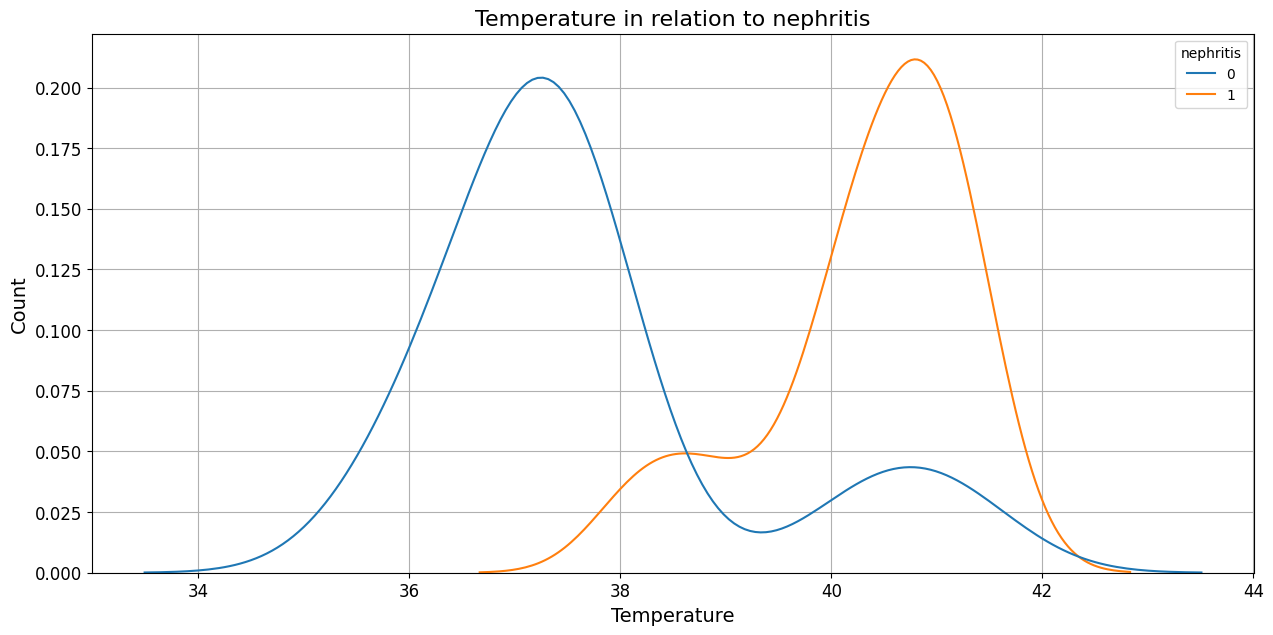

In [20]:
niphritis_n_temp(data=data)

**Observations:**

- Patients are diagnosed with **nephritis** if their body temperature **exceeds 37°C**.

- Patients having temperatures **above 40°C** have a **high chance** of suffering from nephritis.


---
**<h4>Question 5:** Create a function that checks relation between nephritis, nausea and inflammation.</h4>

---

<details>

**<summary>Hint:</summary>**



- Create a 15x7 inch figure

- You can use `sns.countplot` method on `inflammation` feature keeping hue as `nephritis` and keep `data=data[data['nausea']==0]` or `data=data[data['nausea']==1]`.

- Add cosmetics like grid and title

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [22]:
def nausea_n_nephritis(data=None):

  # Create a 15x7 inch figure
  fig= plt.figure(figsize=(15, 7))

  # Create a countplot for burning and keep nephritis as hue
  sns.countplot(data=data, y='inflammation', hue='nephritis', palette='rocket')

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel(xlabel='Count', fontsize=14)
  plt.ylabel(ylabel='Inflammation', fontsize=14)
  plt.title(label='Inflammation in relation to nephritis', fontsize=16)
  plt.grid(visible=True)

  # Display the plot
  plt.show()

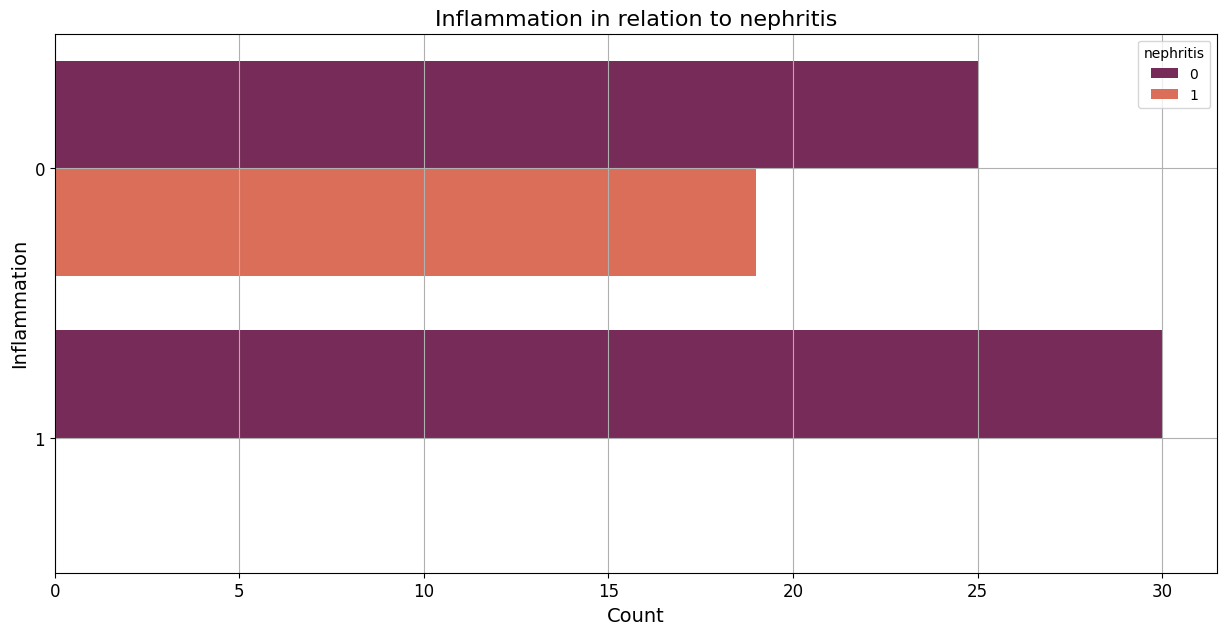

In [23]:
nausea_n_nephritis(data=data[data['nausea']==0])

**Observations:**

- People with **inflammation** and **non-nauseous** had a **lower chance** of suffering from nephritis.

- Some patients who had **none** of the **symptoms** still **suffered** from **nephritis**.

- People who have **nausea** have a **very high chance** of suffering from **nephritis**.

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Extraction**

- In this section, we will extract the important features and seperate the independent and dependent variables.

---
**<h4>Question 6:** Create a function that creates two dataframes for dependent and independent features.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create input dataframe X by dropping only "nephritis" feature from axis 1.

- Create target series by using "nephritis" as value.

</details>


In [24]:
def seperate_Xy(data=None):
  X = data.drop(labels=['nephritis'], axis=1)
  y = data['nephritis']
  return X, y

In [25]:
X, y = seperate_Xy(data=data)

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 7:** Create a function that splits the data into train and test datasets while keeping random state as 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `train_test_split()` to split the dataset.

- Use `test_size` of **0.30**

- Use `random_state` equal to **42**.

- **Stratify** the target variable.

</details>

In [26]:
def Xy_splitter(X=None, y=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = Xy_splitter(X=X, y=y)

Training Data Shape: (69, 7) (69,)
Testing Data Shape: (30, 7) (30,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop a Logistic Regression model, check it's performance using different metrics.

<a name = Section81></a>
### **8.1 Model Development & Evaluation**

---
**<h4>Question 8:** Create a function that instantiates a logistic regression model, fits the model on train set, makes predictions on test set and returns those predictions.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a logistic regression model using LogisticRegression().

- Use `class_weight = 'balanced'`.

- `Fit` the model on training set.

- `Predict` the values on the train set and the test set.

</details>

In [28]:
def train_n_eval():
  # Instantiate a logistic regression model
  clf = LogisticRegression(random_state=42, class_weight='balanced')

  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using train data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  y_pred_proba = clf.predict_proba(X_test)

  y_train_proba = clf.predict_proba(X_train)

  return y_pred_train, y_pred, y_pred_proba, y_train_proba

In [32]:
y_pred_train, y_pred, y_test_pred_proba, y_train_pred_proba = train_n_eval()



---
**<h4>Question 9:** Create a function that evaluates the model's training and testing predictions on the given metrics:</h4>

---

- Accuracy score
- Precision score
- Recall score
- F1 score



<details>

**<summary>Hint:</summary>**

- Evaluate the predictions using the `accuracy_score`, `precision_score`, `recall_score` and `f1_score` on the train set and the test set.

</details>

In [33]:
def calculate_metrics(y_pred=None, y_pred_train=None):

  # Calculate accuracy of the model
  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred)

  # Calculate precision of the model
  train_precision = precision_score(y_train, y_pred_train)
  test_precision = precision_score(y_test, y_pred)

  # Calculate recall of the model
  train_recall = recall_score(y_train, y_pred_train)
  test_recall = recall_score(y_test, y_pred)

  # Calculate f1 score of the model
  train_f1 = f1_score(y_train, y_pred_train)
  test_f1 = f1_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of Logistic Regression Model:')
  print('----------------------------------------')
  print('[Train Accuracy]:', train_accuracy)
  print('[Test Accuracy]:', test_accuracy)
  print('----------------------------------------')
  print('[Train Precision]:', train_precision)
  print('[Test Precision]:', test_precision)
  print('----------------------------------------')
  print('[Train Recall]:', train_recall)
  print('[Test Recall]:', test_recall)
  print('----------------------------------------')
  print('[Train F1 score]:', train_f1)
  print('[Test F1 score]:', test_f1)
  print('----------------------------------------')

In [34]:
calculate_metrics(y_pred=y_pred, y_pred_train=y_pred_train)

Performance Metric of Logistic Regression Model:
----------------------------------------
[Train Accuracy]: 1.0
[Test Accuracy]: 1.0
----------------------------------------
[Train Precision]: 1.0
[Test Precision]: 1.0
----------------------------------------
[Train Recall]: 1.0
[Test Recall]: 1.0
----------------------------------------
[Train F1 score]: 1.0
[Test F1 score]: 1.0
----------------------------------------


**Observations:**

- We observe that all of our metrics have **100% score** on train and test set.


---
**<h4>Question 10:** Create a function that plots the Precision-Recall curve for the predictions on train and test data.</h4>

---

<details>

**<summary>Hint:</summary>**

- For plot_precision_recall_builder():

  - Calculate the precision and recall values at various thresholds using `precision_recall_curve()` method.

  - Calculate the average precision and recall values using `np.mean()`

  - Plot the curve using  `sns.lineplot()` and plot the average precision and recall values with respect to `[0, 1]`.

  - Add some cosmetics like title, grid and legend.

  - Keep label size as 14 and title size as 16.

- For plot_precision_recall():

  - Create 2 subplots and call the builder function seperately for train predictions and test predictions.

  - Add some more cosmetics like super title.

</details>

In [41]:
def plot_precision_recall_builder(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot average values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true,y_pred)

  # Calculate the average precision and recall scores
  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  # Create a lineplot of precision and recall values
  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')

  # Add cosmetics
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(visible=True)

In [42]:
def plot_precision_recall():
  # Create a 20x7 inches figure
  figure = plt.figure(figsize = [20, 7])

  # Create a subplot
  plt.subplot(1, 2, 1)

  # Plot the precision-recall curve for the training set
  plot_precision_recall_builder(y_true=y_train, y_pred=y_train_pred_proba[:,1], train_or_test='Train Data')

  # Create a subplot
  plt.subplot(1, 2, 2)

  # Plot the precision-recall curve for the test set
  plot_precision_recall_builder(y_true=y_test, y_pred=y_test_pred_proba[:, 1], train_or_test='Test Data')

  # Add a supertitle
  plt.suptitle('Precision & Recall Curve', size = 16)

  # Display the output
  plt.show()

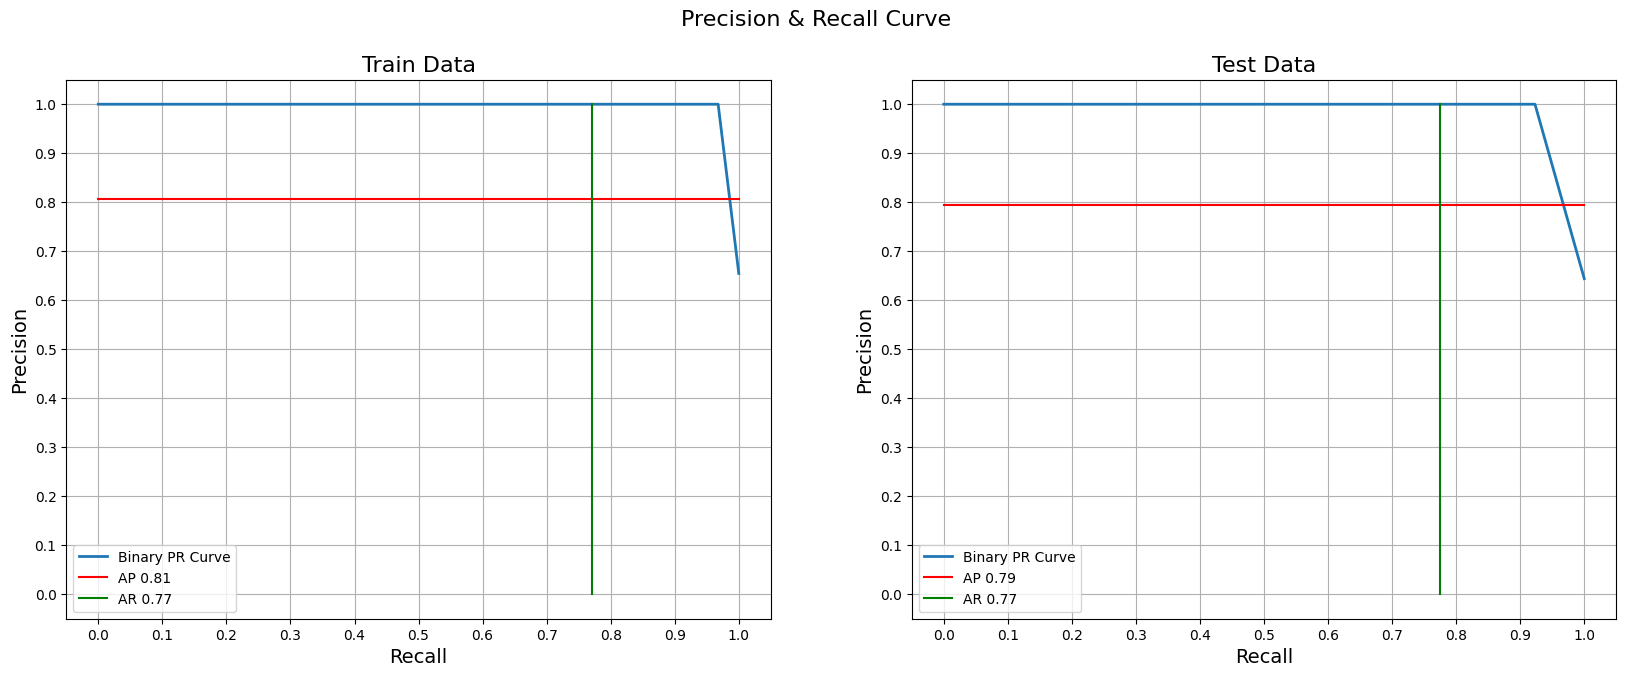

In [43]:
plot_precision_recall()

**Observations:**

- Since our **precision** and **recall** are **1**, we get the ideal plots for Precision-Recall curve.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We have seen that **inflammation** is **not relevant** to **nephritis** according to our data.

- Body **temperature** and **nausea** play an **important role** in determining if a patient suffers from **nephritis**.

- We have also **developed** a model and successfully **tested** it on various evaluation metrics.

- Although based on **patient's temperature** and **responses**, we can **predict** if the patient suffers from nephritis or not.

- If we can get a **better snapshot of data** and more features that relate to nephritis, we can train a model ready for **real-world information**.